# Emergency - 911 calls Dataset

This kaggle data set can be found here 
https://www.kaggle.com/mchirico/montcoalert

--Data Analysis by SJ

## Data and Setup

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv("911-emergency.csv")

In [72]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Top 5 zip codes for 911 calls are 

In [74]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

### top 5 townships (twp) for 911 calls are

In [75]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

### Number of unique emergency titles/ contexts

In [76]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

### creating a new feature by extracting "reason/department" from the 'title' feature

In [77]:
df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])

In [78]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason'],
      dtype='object')

In [79]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### common reasons for emergency call by order or precedence are:

In [80]:
df["Reason"].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### count plot of emergency calls by reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

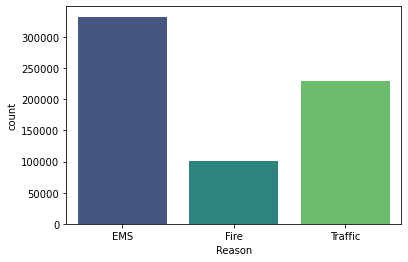

In [81]:
sns.countplot(x="Reason",data=df,palette="viridis")

### Analysing timing of calls


In [82]:
type(df['timeStamp'][0])

str

In [83]:
#converting str to date-time object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [84]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [85]:
time = df['timeStamp'].iloc[0]

In [86]:
df['timeStamp'][0]

Timestamp('2015-12-10 17:10:52')

In [87]:
time.hour

17

In [88]:
time.day

10

In [89]:
time.minute

10

In [90]:
time.second

52

In [91]:
time.year

2015

In [92]:
time.month

12

### creating three features - Hour , Month, DayOfWeek

In [93]:
df['Hour'] = df['timeStamp'].apply(lambda i: i.hour)

In [94]:
df['Month'] = df['timeStamp'].apply(lambda i: i.month)

In [95]:
df['DayOfWeek'] = df['timeStamp'].apply(lambda i:i.dayofweek)

In [96]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayOfWeek']=df['DayOfWeek'].map(dmap)

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


###  countplot of the Day of Week column with the hue based off of the Reason column

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

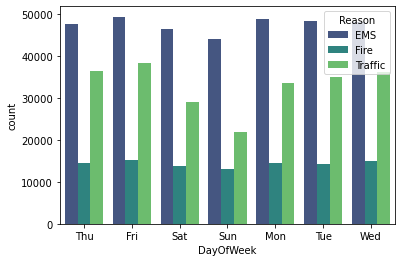

In [98]:
sns.countplot(x='DayOfWeek',data=df,hue='Reason',palette='viridis')

In [99]:
# mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [100]:
# df['Month'] = df['Month'].map(mmap)

<AxesSubplot:xlabel='Month', ylabel='count'>

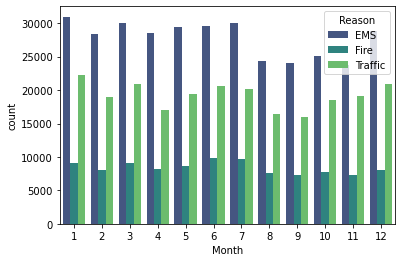

In [101]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [102]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


### count of calls per month

<AxesSubplot:xlabel='Month'>

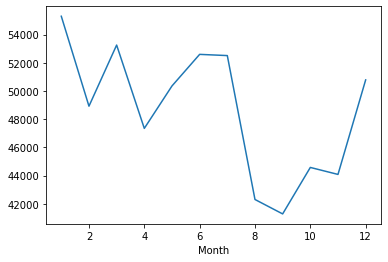

In [103]:
byMonth['zip'].plot()

### using linear fit for number of calls per month to fill in missing values

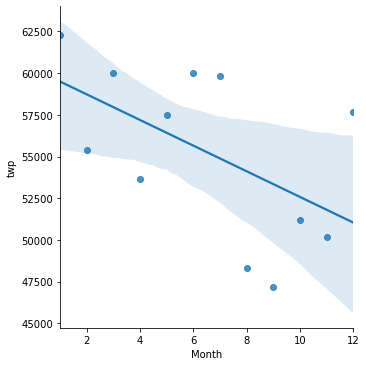

In [105]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [106]:
#creating date feature
df['Date'] = df['timeStamp'].apply(lambda i:i.date)

In [108]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,<built-in method date of Timestamp object at 0...
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,<built-in method date of Timestamp object at 0...


In [109]:
del df['Date']

In [110]:
df['Date'] = df['timeStamp'].apply(lambda i:i.date())

In [111]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


In [119]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


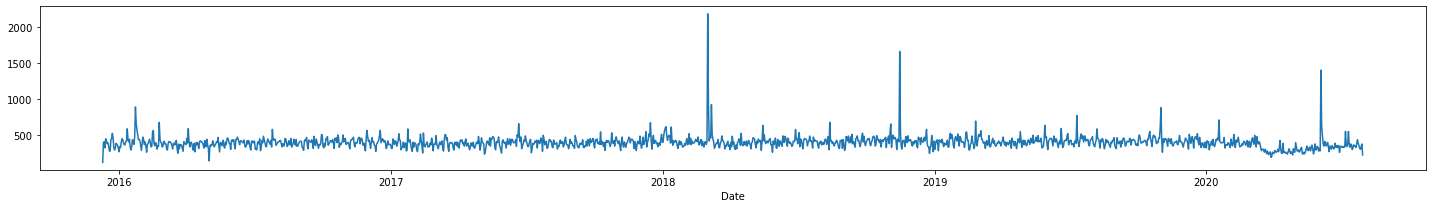

In [137]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
# plt.rcParams["figure.figsize"] = (20,3)

### Call rate by reason 

In [141]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,41
2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,137
2015-12-12,145,145,145,110,145,145,145,145,145,145,145,145,145
2015-12-13,75,75,75,53,75,75,75,75,75,75,75,75,75
2015-12-14,184,184,184,150,184,184,184,184,184,184,184,184,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,81,81,81,66,81,81,81,81,81,81,81,81,81
2020-07-26,88,88,88,76,88,88,88,88,88,88,88,88,88
2020-07-27,84,84,84,58,84,84,84,84,84,84,84,84,84


<Figure size 1440x576 with 0 Axes>

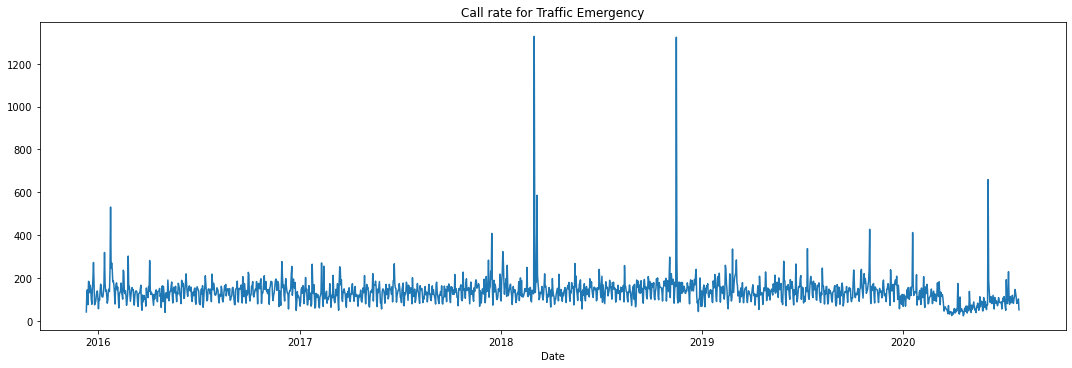

<Figure size 1440x576 with 0 Axes>

In [153]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("Call rate for Traffic Emergency")
plt.figure(figsize=(20,8))

Text(0.5, 1.0, 'Call rate for Fire Emergency')

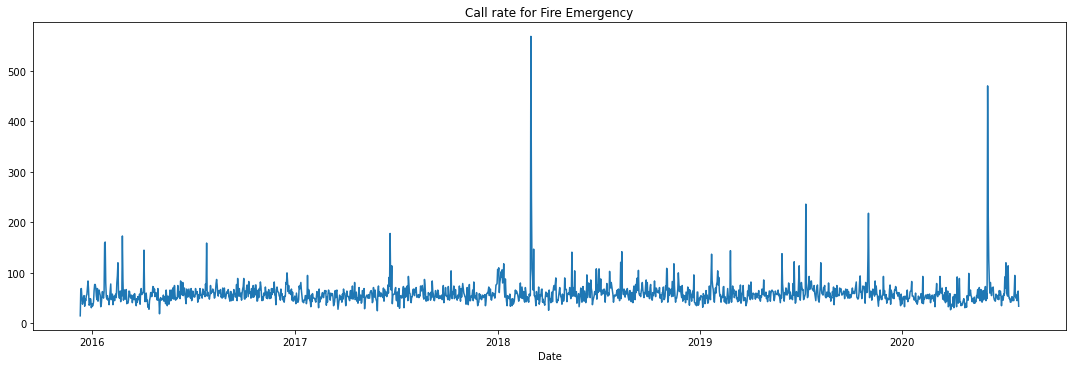

In [144]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("Call rate for Fire Emergency")

Text(0.5, 1.0, 'Call rate for EMS Emergency')

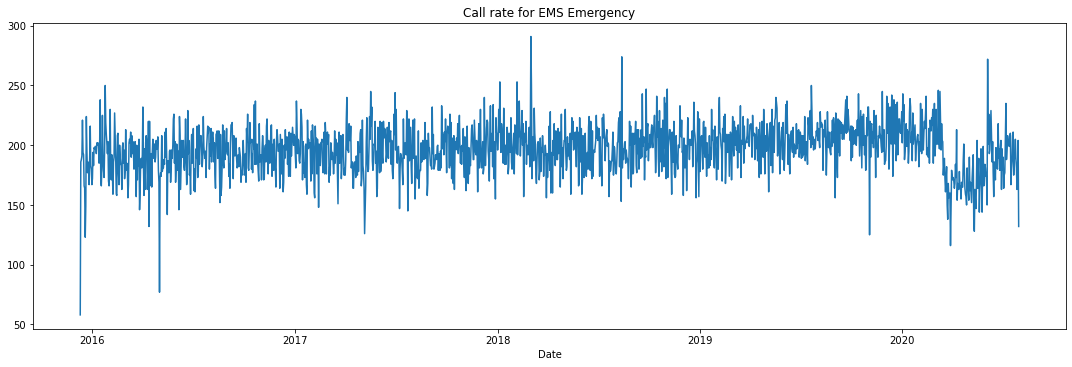

In [145]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("Call rate for EMS Emergency")

### restructuring dataframe to analyse call rate by the hour and by date

In [151]:
df.groupby(by=['DayOfWeek','Hour']).count()['twp'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Sat,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sun,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thu,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tue,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wed,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


In [ ]:
dayhour = df.groupby(by=['DayOfWeek','Hour']).count()['twp'].unstack()

### Heatmap 

<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

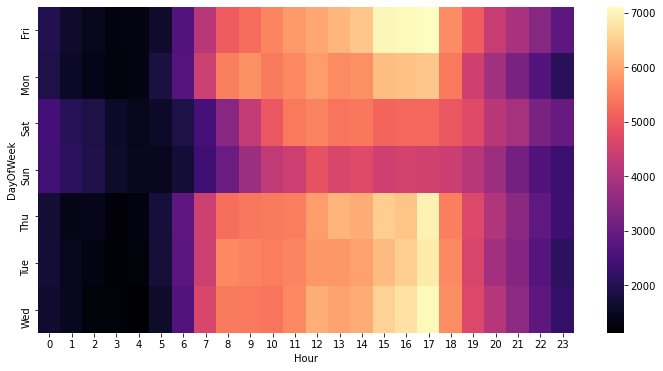

In [159]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='magma')

Lighter area of the heatmap indicates higher frequency of emergency calls during the hour and day

### Clustermap

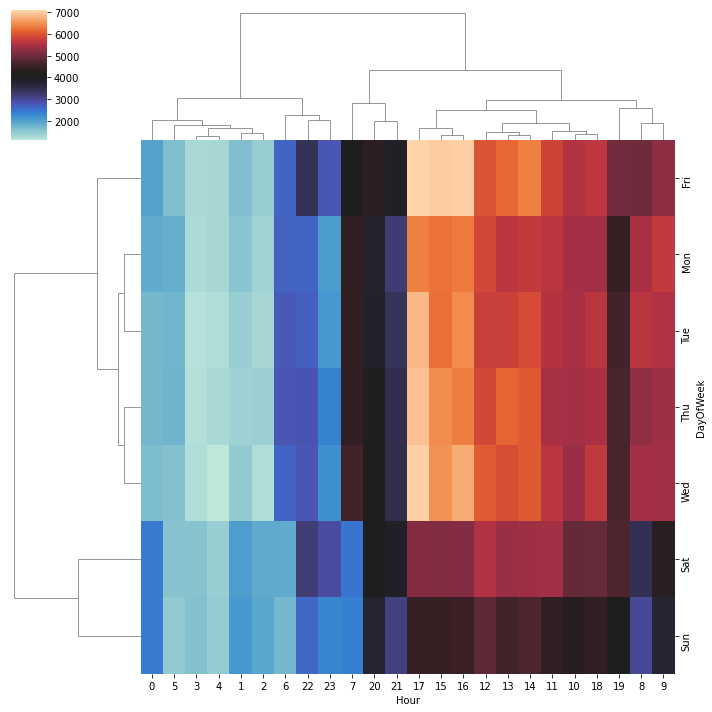

In [161]:
sns.clustermap(dayhour,cmap='icefire')

### Analysing call rate by month and day of week

In [171]:
df.groupby(by=['DayOfWeek','Month']).count()['twp'].unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Mon,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Sat,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sun,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thu,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147
Tue,9711,8083,8370,7561,9020,8340,9078,7289,6597,7946,7341,8301
Wed,9406,8294,8987,7598,9034,9440,8576,7979,6842,7871,7407,7677


In [172]:
daymonth = df.groupby(by=['DayOfWeek','Month']).count()['twp'].unstack()

<AxesSubplot:xlabel='Month', ylabel='DayOfWeek'>

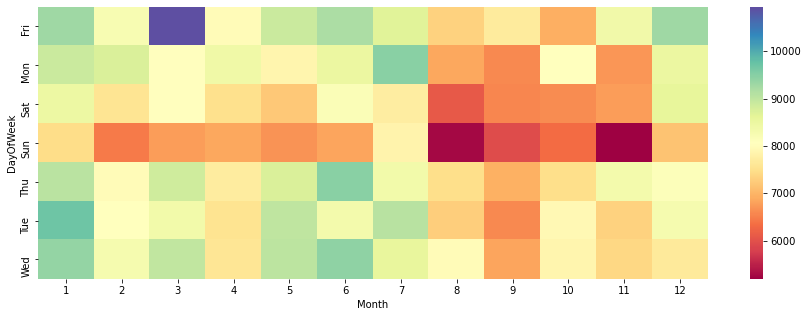

In [178]:
sns.heatmap(daymonth,cmap='Spectral')

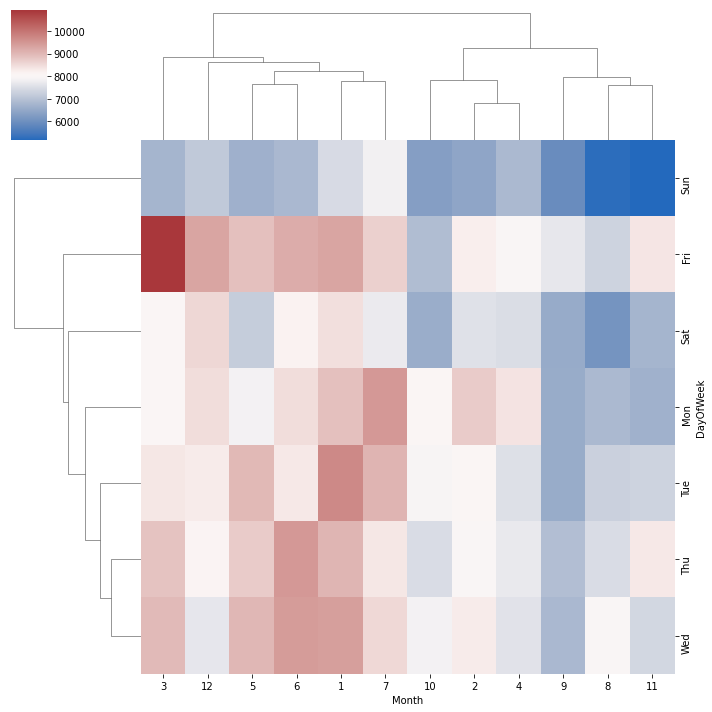

In [175]:
sns.clustermap(daymonth,cmap="vlag")

### ----- The End -----